This project requires Python 3.7 or above:

It also requires Scikit-Learn ≥ 1.0.1:

# Get the Data

We are goint to predict median house values in Californian districts, given a number of features from these districts.
# California Housing introduction

## Source
This dataset is a version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled *Sparse Spatial Autoregressions* by Pace, R. Kelley and Ronald Barry, published in the *Statistics and Probability Letters* journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).



## Data description

    >>> housing.info()
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 20640 entries, 0 to 20639
    Data columns (total 10 columns):
    longitude             20640 non-null float64
    latitude              20640 non-null float64
    housing_median_age    20640 non-null float64
    total_rooms           20640 non-null float64
    total_bedrooms        20433 non-null float64
    population            20640 non-null float64
    households            20640 non-null float64
    median_income         20640 non-null float64
    median_house_value    20640 non-null float64
    ocean_proximity       20640 non-null object
    dtypes: float64(9), object(1)
    memory usage: 1.6+ MB
    
    >>> housing["ocean_proximity"].value_counts()
    <1H OCEAN     9136
    INLAND        6551
    NEAR OCEAN    2658
    NEAR BAY      2290
    ISLAND           5
    Name: ocean_proximity, dtype: int64


# **Table of Contents**
* [Get the data](#1)
* [California Housing Introduction](#2)
* [Read and visualize the data](#3)
* [Prepare the Data for Machine Learning Algorithms with pyspark](#4)
* [](#5)
* [](#6)
* [](#7)


# Read and visualize the data v

Upload de csv and image file

In [1]:
#to upload de dataset files
from google.colab import files

# Seleccionar archivos localmente
uploaded = files.upload()

Saving california.png to california.png
Saving housing.csv to housing.csv


In [3]:

import pandas as pd



housing = pd.read_csv("housing.csv")

## Take a Quick Look at the Data Structure

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Precio Medio de la vivienda: 206855.816909

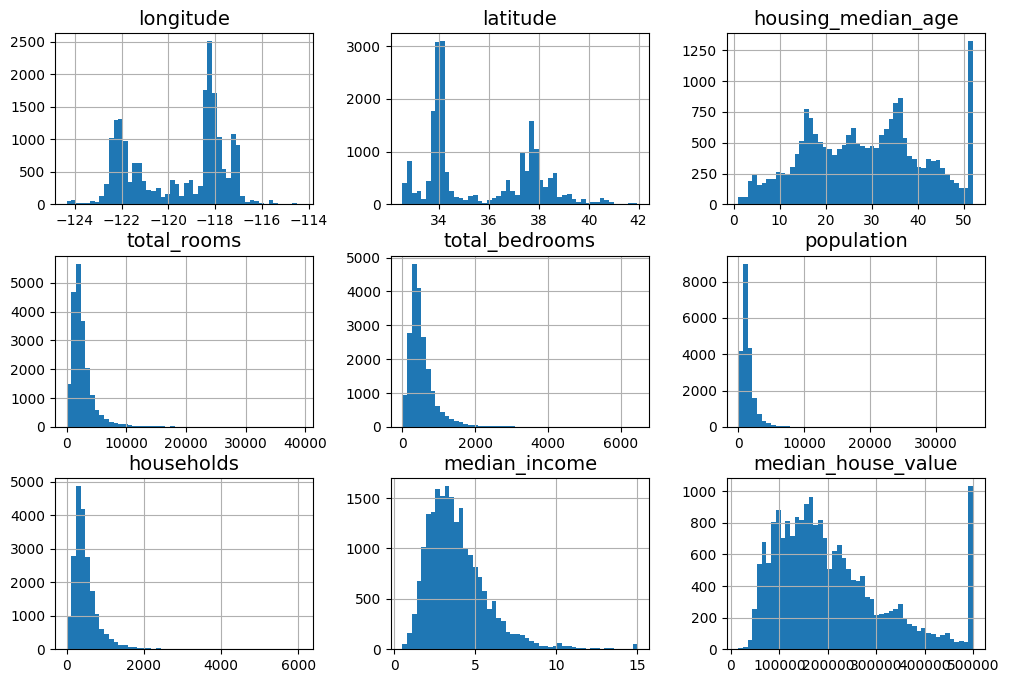

In [8]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

## Create a Test Set

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split



Dividimos la columna median_income en grupos en función de los mismos

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

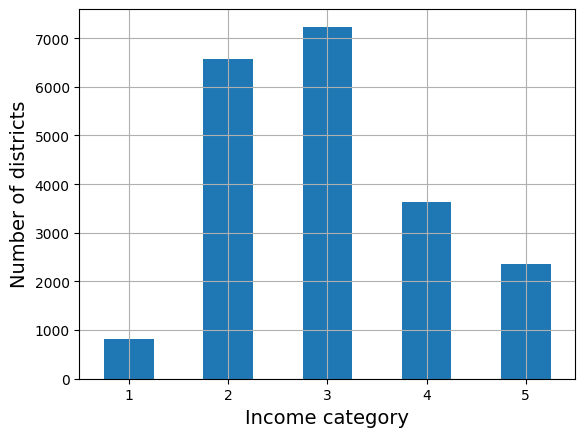

In [12]:
import matplotlib.pyplot as plt
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Dividimos el dataset proporcionalmente a los ingresos (mantenemos la proporción de income category) para entrenar el modelo

In [13]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [14]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4


Una vez obtenidos los datos de entrenamiento y prueba elimnamos la columna income_cat

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [17]:
housing = strat_train_set.copy()
test= strat_test_set.copy()

## Visualizing Geographical Data

Visualizamos las casas en función de su longitud y latitud con una transparencia del 0.2

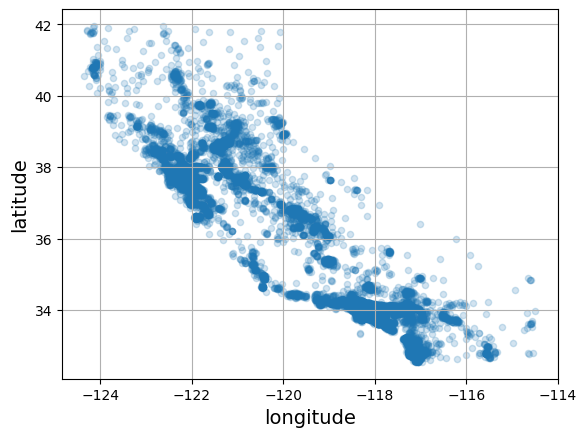

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

mostramos la población relativa existente en los distritos

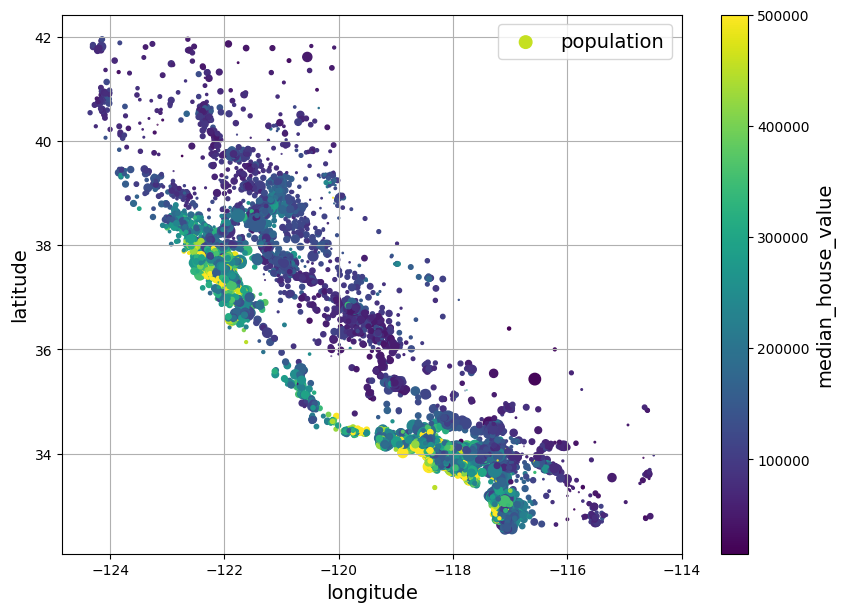

In [19]:


housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

Cargamos una imagen de californi y superponemos en ella las distintas casas y la población de los distritos en distintos colores

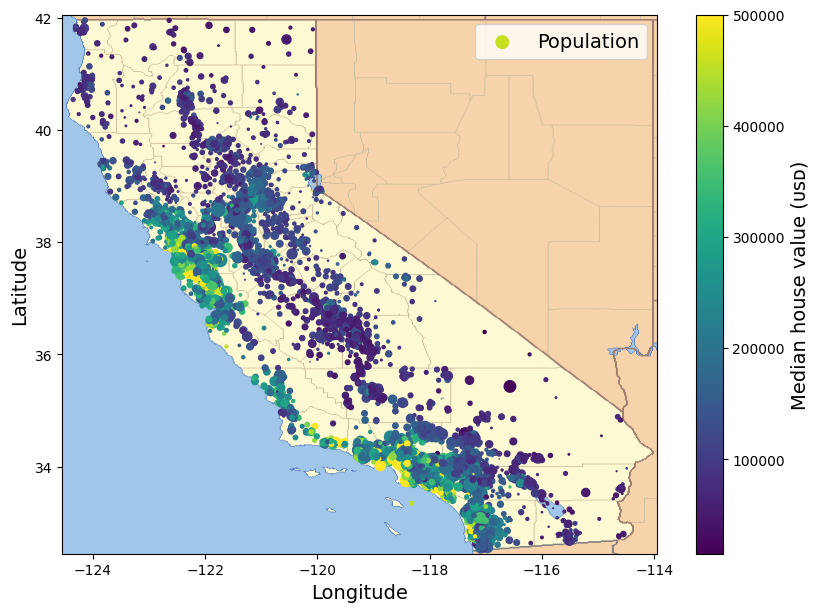

In [20]:

filename = "california.png"


housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

## Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [21]:
corr_matrix = housing.corr(numeric_only=True)

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Vemos las características con mayor correlación con respecto al valor de la casa (median_house_value)

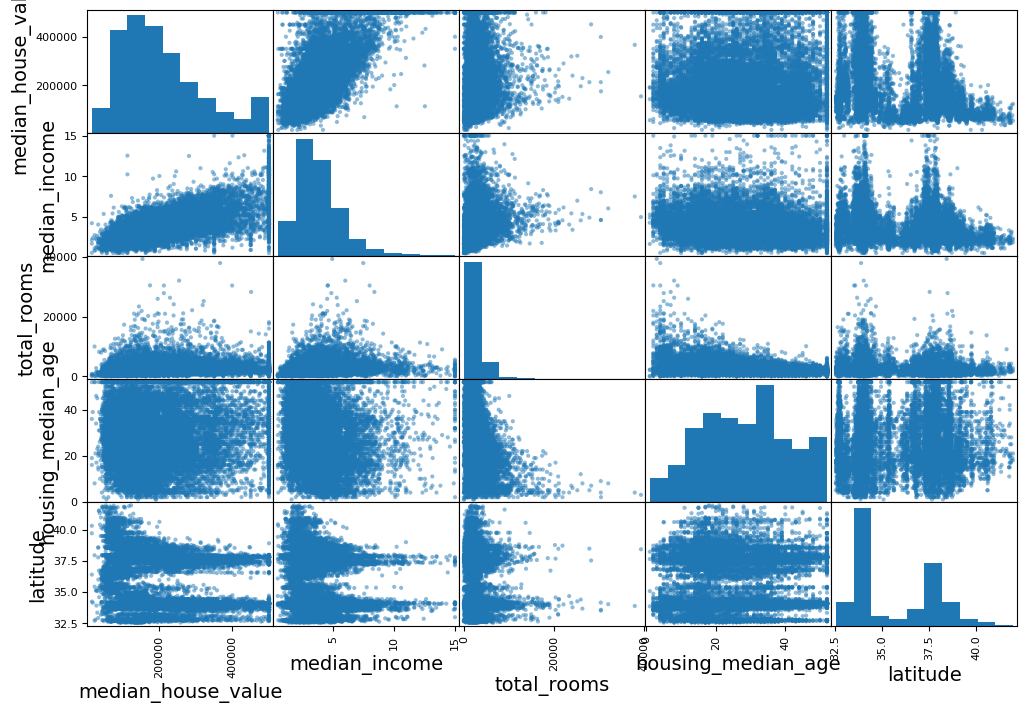

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age","latitude"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

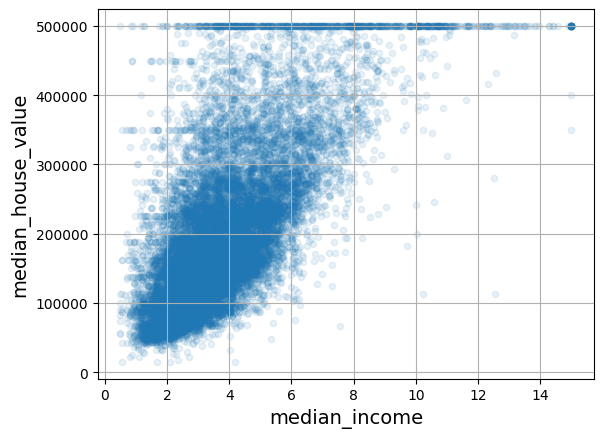

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

# Prepare the Data for Machine Learning Algorithms with pyspark

---



Importamos la librería pyspark y los módulos con los que vamos a trabajar. También creamos la sesión de spark con la que vamos a trabajar

In [25]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=bc69489c4787750cd7d92f99d31ee0f61d186d068efa966e6b7aa396b7ed6477
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [27]:
import os
import pandas as pd
import numpy as np
import re
from pylab import *
from pyspark.sql.functions import udf, concat, col, lit, sum, isnan, count, when
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
import pyspark.sql.functions as F

#Creating spark session
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()
sqlContext = SQLContext(sc)

from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import SQLTransformer
from pyspark.ml import Pipeline


import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


So now it's time to create our models. Spark ML is a package which aims to provide a uniform set of high-level APIs that help users create and tune practical machine learning pipelines. Spark ML standardizes APIs for machine learning algorithms to make it easier to combine multiple algorithms into a single pipeline, or workflow.
Here as we are using pyspark to create our models, we first have to convert our data from pandas frame to spark frame.

In [28]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


In [29]:
df_train = housing.copy()
df_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


In [30]:
df_train.info()


# Mostrar los DataFrames


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


## Resetamos índices y creamos el dataframe de spark

In [31]:
df_reset = df_train.reset_index(drop=True)
train = sqlContext.createDataFrame(df_reset)
train.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.42|    37.8|              52.0|     3321.0|        1115.0|    1576.0|    1034.0|       2.0987|          458300.0|       NEAR BAY|
|  -118.38|   34.14|              40.0|     1965.0|         354.0|     666.0|     357.0|       6.0876|          483800.0|      <1H OCEAN|
|  -121.98|   38.36|              33.0|     1083.0|         217.0|     562.0|     203.0|        2.433|          101700.0|         INLAND|
|  -117.11|   33.75|              17.0|     4174.0|         851.0|    1845.0|     780.0|       2.2618|           96100.0|         INLAND|
|  -118.15|   33.77|              

Comprobamos la existencia de valores inexistentes

In [32]:


# Contar valores NaN en cada columna
nan_counts = train.select([count(when(isnan(column), column)).alias(column) for column in train.columns])

# Mostrar el resultado
nan_counts.show()



+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|        0|       0|                 0|          0|           168|         0|         0|            0|                 0|              0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+



Dado que hemos visto que hay registros sin habitaciones vamos a usar pyspark para imputar la mediana a los valores no disponibles

In [34]:
imputer = Imputer(inputCols=["total_bedrooms"], outputCols=["total_bedrooms_imputed"], strategy="median")
model = imputer.fit(train)

# Aplicar la transformación y mostrar el DataFrame resultante
imputed_bedrooms = model.transform(train)
imputed_bedrooms.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|total_bedrooms_imputed|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+
|  -122.42|    37.8|              52.0|     3321.0|        1115.0|    1576.0|    1034.0|       2.0987|          458300.0|       NEAR BAY|                1115.0|
|  -118.38|   34.14|              40.0|     1965.0|         354.0|     666.0|     357.0|       6.0876|          483800.0|      <1H OCEAN|                 354.0|
|  -121.98|   38.36|              33.0|     1083.0|         217.0|     562.0|     203.0|        2.433|          101700.0|         INLAND|                 217.0|
|  -117.11|   33.75|              

Comprobamos que no  hay valores vacíos (NaN) en los valores imputados y sólo quedarían en total_bedrooms (que no usaremos para el entreanmiento del modelo)







In [35]:
from pyspark.sql.functions import col, isnan, when, count

# Contar valores NaN en cada columna
nan_counts = imputed_bedrooms.select([count(when(isnan(col(column)) | col(column).isNull(), column)).alias(column) for column in imputed_bedrooms.columns])

# Mostrar el resultado
nan_counts.show()


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|total_bedrooms_imputed|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+
|        0|       0|                 0|          0|           168|         0|         0|            0|                 0|              0|                     0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+



## Añadimos columnas combinando datos para observar la correlación de los mismos

Añadimos una serie de columnas con datos calculados para observar la correlación

In [36]:
#imputed_bedrooms =imputed_bedrooms.drop("total_bedrooms")
# Calcular las columnas 'rooms_per_house', 'bedrooms_ratio' y 'people_per_house'
train_calculated = imputed_bedrooms.withColumn("rooms_per_house", col("total_rooms") / col("households")) \
                        .withColumn("bedrooms_ratio", col("total_bedrooms_imputed") / col("total_rooms")) \
                        .withColumn("people_per_house", col("population") / col("households"))

# Mostrar el DataFrame resultante

train_calculated.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+------------------+-------------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|total_bedrooms_imputed|   rooms_per_house|     bedrooms_ratio|  people_per_house|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+------------------+-------------------+------------------+
|  -122.42|    37.8|              52.0|     3321.0|        1115.0|    1576.0|    1034.0|       2.0987|          458300.0|       NEAR BAY|                1115.0| 3.211798839458414|  0.335742246311352|1.5241779497098646|
|  -118.38|   34.14|              40.0|     1965.0|         354.0|     666.0|     357.0|       6.0876|          483800.0|   

Vamos a ver ahora la matriz de correlación con respecto al precio de la vivienda (sólo de las características numéricas)

In [37]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.sql.types import StructType, StructField, FloatType

# Crear el ensamblador con handleInvalid="skip"
assembler = VectorAssembler(
    inputCols=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms_imputed",
               "population", "households", "median_income",
               "rooms_per_house", "bedrooms_ratio", "people_per_house"],
    outputCol="features",
    handleInvalid="skip"  # Otra opción es "keep" o "error"
)

# Aplicar el ensamblador al DataFrame
assembled_df = assembler.transform(train_calculated).select("features", "median_house_value")

# Calcular la matriz de correlación entre 'median_house_value' y las características numéricas
correlation_matrix = Correlation.corr(assembled_df, "features").head()

# Extraer la correlación de 'median_house_value' con las características numéricas
correlation_values = correlation_matrix[0].toArray()[-1]

# Convertir los valores de correlación a Python float
correlation_values = [float(value) for value in correlation_values]

# Crear un DataFrame para mostrar los resultados
schema = StructType([
    StructField("feature", StringType(), False),
    StructField("correlation", FloatType(), False)
])
correlation_data = zip(assembler.getInputCols(), correlation_values)
correlation_df = spark.createDataFrame(correlation_data, schema)
correlation_df.orderBy("correlation", ascending=False).show()




+--------------------+-------------+
|             feature|  correlation|
+--------------------+-------------+
|    people_per_house|          1.0|
|          population|   0.08520367|
|           longitude|  0.024587149|
|  housing_median_age|   0.01277087|
|     rooms_per_house| 0.0038680225|
|      bedrooms_ratio| -0.006028142|
|       median_income|-0.0066624205|
|            latitude| -0.026457205|
|         total_rooms| -0.037701625|
|          households|  -0.04245242|
|total_bedrooms_im...| -0.044982366|
+--------------------+-------------+



Los campos calculados no mejoran la correlación asíque emplearemos las características originales

## Handling Text and Categorical Attributes

Vamos a convertir los valores texto a numérico

In [38]:
# Obtener los valores únicos de la columna 'ocean_proximity' y contar el número de ocurrencias de cada valor
value_counts = train.groupBy("ocean_proximity").count().orderBy("ocean_proximity")

# Mostrar los valores únicos junto con el recuento de cada valor
value_counts.show()

+---------------+-----+
|ocean_proximity|count|
+---------------+-----+
|      <1H OCEAN| 7274|
|         INLAND| 5301|
|         ISLAND|    2|
|       NEAR BAY| 1846|
|     NEAR OCEAN| 2089|
+---------------+-----+



Now let's preprocess the categorical input feature, `ocean_proximity`:

In [40]:
indexer = StringIndexer(inputCol='ocean_proximity',outputCol='ocean_proximity_coded')

Then data is converted which are required to predict survival into vector form by using VectorAssembler as VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models.
Normalizer is a Transformer which transforms a dataset of Vector rows, normalizing each Vector to have unit norm. It takes parameter p, which specifies the p-norm used for normalization. This normalization can help standardize your input data and improve the behavior of learning algorithms. So then we normalize our data by using Normalizer.

In [41]:

vector = VectorAssembler(inputCols=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms_imputed",
               "population", "households", "median_income","ocean_proximity_coded"],outputCol='features')
normalizer = Normalizer(inputCol='features',outputCol='features_norm', p=1.0)

Podemos crear un Pipeline para aplicar todas las transformaciones que hemos realizado con los datos y así poder aplicarlo a por ejemplo, el de test.

In [43]:

# Crear el pipeline
pipeline = Pipeline(stages=[imputer, indexer, vector, normalizer])

# Ajustar el pipeline al conjunto de datos
#pipeline_model = pipeline.fit(train_calculated)
pipeline_model = pipeline.fit(train)

# Aplicar el pipeline para obtener el DataFrame resultante
#train_normalized = pipeline_model.transform(train_calculated)

train_normalized = pipeline_model.transform(train)

# Mostrar el DataFrame resultante
train_normalized.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+---------------------+--------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|total_bedrooms_imputed|ocean_proximity_coded|            features|       features_norm|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+---------------------+--------------------+--------------------+
|  -122.42|    37.8|              52.0|     3321.0|        1115.0|    1576.0|    1034.0|       2.0987|          458300.0|       NEAR BAY|                1115.0|                  3.0|[-122.42,37.8,52....|[-0.0168545543788...|
|  -118.38|   34.14|              40.0|     1965.0|         354.0|     666.0|     357.0|       6.087

Mostramos el resultado del vector normalizado

In [44]:
train_normalized.select('features_norm').show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_norm                                                                                                                                                                                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[-0.01685455437884063,0.005204232605131316,0.007159261784836731,0.4572290074508228,0.15351109404024915,0.2169807033250517,0.14235916702925347,2.8894505207378553E-4,4.1303433374058064E-4]   |
|[-0.03343493924602094,0.00964241278813275,0.011297495943916519,0.554989488244899,0.0999828391036612,0.18810330746621004,0.10083015129945494,0.0017193659077046552,0.0]                       |
|[-0.05393114163092406,0.016960145867865

# Uso de AutoML con los datos calculados

Convertimos el vector normalizado a un dataFrame de pandas para su uso en AutoML

In [45]:

Cols=["longitude", "latitude", "housing_median_age", "total_rooms",
      "total_bedrooms_imputed", "population", "households",
      "median_income","ocean_proximity_coded"]
# Primero, convierte el DataFrame de Spark a un DataFrame de pandas
pandas_df = train_normalized.select("features_norm","median_house_value").toPandas()
pandas_target = train_normalized.select("median_house_value").toPandas()

# Luego, expande el vector normalizado en columnas individuales
df_autoML = pd.DataFrame(pandas_df['features_norm'].tolist(), columns=Cols)
pandas_targetML = pd.DataFrame(pandas_target['median_house_value'].tolist(),columns=["median_house_value"])
# Concateno con la característica target para convertirlo posteriormente a dataframe h2O
df_autoML= pd.concat( [df_autoML, pandas_targetML], axis=1)


In [46]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.3 MB/s eta 0:00:00


In [47]:
len(df_autoML)

16512

Probamos automl entrenando sin cross validation ni los algoritmos de tipo
'StackedEnsemble' y 'DeepLearning'

In [48]:
import h2o
from h2o.automl import H2OAutoML
# Iniciar H2O
h2o.init()
# Clear H2OFrame cache
h2o.remove_all()

#df_autoML = pd.concat([housing['median_house_value'],df_autoML],axis=1)

# Convertir el DataFrame de Pandas a H2OFrame
h2o_df = h2o.H2OFrame(df_autoML)


#    'max_models': 20,  # Number of models to build during AutoML search
#    'seed': 1234,     # Random seed for reproducibility (optional)
#    'stopping_metric': 'AUC',  # Early stopping metric (adjust as needed)


#,exclude_algos=['StackedEnsemble','DeepLearning']
# Entrenar AutoML #["StackedEnsemble",
aml = H2OAutoML(max_models=5, seed=42, stopping_metric='auto',max_runtime_secs=3600,
                exclude_algos=['StackedEnsemble','DeepLearning'], verbosity='info')
# usamos nfolds=5, es decir validación cruzada con 5 grupos
# Create and train AutoML using H2OFrame





aml.train(x=Cols,
          y='median_house_value',
          training_frame=h2o_df)


# Evaluar el rendimiento del modelo
leaderboard = aml.leaderboard
print('leaderboard',leaderboard)

# Evaluar el mejor modelo en el conjunto de datos
performance = aml.leader.model_performance(h2o_df)
print('rendimiento',performance)

model = aml.leader

best_autoML_name = leaderboard['model_id'][0][0]

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvrdgr1bm
  JVM stdout: /tmp/tmpvrdgr1bm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvrdgr1bm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_93a10c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
18:27:14.953: Project: AutoML_1_20240417_182714
18:27:14.957: 5-fold cross-validation will be used.
18:27:14.958: Setting stopping tolerance adaptively based on the training frame: 0.007782160079558629
18:27:14.958: Build control seed: 42
18:27:14.960: training frame: Frame key: AutoML_1_20240417_182714_training_Key_Frame__upload_ae4133ecc7edf00c2c1d72970af94928.hex    cols: 10    rows: 16512  chunks: 1    size: 1255592  checksum: -1369609336428596118
18:27:14.960: validation frame: NULL
18:27:14.960: leaderboard frame: NULL
18:27:14.961: blending frame: NULL
18:27:14.961: response column: median_house_value
18:27:14.962: fold column: null
18:27:14.962: weights column: null
18:27:14.988: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g

Vemos que el RMSE sobre los datos de entrenamiento es de 53.540 USD

# Obtener las predicciones del mejor modelo sobre los datos de test


In [49]:
#dataframe test cuyo nombre es test
df_test = test.copy()
df_test.reset_index(drop=True)

#Creamos el dataFrame de spark
df_test = sqlContext.createDataFrame(df_test)

#aplicamos el pipeline para transformar los datos y obtener el vector
test_normalized = pipeline_model.transform(df_test)
test_normalized.show()

pandas_test = test_normalized.select("features_norm","median_house_value").toPandas()
pandas_target = test_normalized.select("median_house_value").toPandas()
test_autoML =  pd.DataFrame(pandas_test['features_norm'].tolist(), columns=Cols)
test_targetML = pd.DataFrame(pandas_target['median_house_value'].tolist(),columns=["median_house_value"])
df_test_autoML = pd.concat([test_autoML, test_targetML],axis=1)

ho2_test = h2o.H2OFrame(df_test_autoML)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+---------------------+--------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|total_bedrooms_imputed|ocean_proximity_coded|            features|       features_norm|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+----------------------+---------------------+--------------------+--------------------+
|  -121.95|   37.11|              21.0|     2387.0|         357.0|     913.0|     341.0|        7.736|          397700.0|      <1H OCEAN|                 357.0|                  0.0|[-121.95,37.11,21...|[-0.0291342435226...|
|  -118.01|   33.89|              36.0|     1589.0|         265.0|     804.0|     272.0|       4.635

In [50]:
predictions_test = aml.leader.predict(ho2_test)
print('Predicciones /n',predictions_test)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Predicciones /n   predict
   358350
   228678
   324160
   269733
   240577
   188989
   107840
   344003
   389646
   242863
[4128 rows x 1 column]



In [52]:

performance = model.model_performance(test_data=ho2_test)



# Calcular y mostrar el RMSE
rmse = performance.rmse()
print("RMSE:", rmse)

RMSE: 62015.07947360968


Modificamos los parámetros de autoML: aumentamos el número máximo de modelos, usamos cross validation con valor 5 y no excluímos algoritmos 'StackedEnsemble'y 'DeepLearning'




In [53]:
# Iniciar H2O
h2o.init()
# Clear H2OFrame cache
h2o.remove_all()

h2o_df = h2o.H2OFrame(df_autoML)


# Entrenar AutoML
aml = H2OAutoML(max_models=15, seed=42, stopping_metric='auto',max_runtime_secs=3600,
                verbosity='info', nfolds=5)
# usamos nfolds=5, es decir validación cruzada con 5 grupos
# Create and train AutoML using H2OFrame

aml.train(x=Cols,y='median_house_value', training_frame = h2o_df)


# Evaluar el rendimiento del modelo
leaderboard = aml.leaderboard
print('leaderboard',leaderboard)

# Evaluar el mejor modelo en el conjunto de prueba
performance = aml.leader.model_performance(h2o_df)
print('rendimiento',performance)

model = aml.leader

best_autoML_name = leaderboard['model_id'][0][0]


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 mins 39 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_93a10c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.067 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
18:35:49.259: Project: AutoML_2_20240417_183549
18:35:49.259: Setting stopping tolerance adaptively based on the training frame: 0.007782160079558629
18:35:49.259: Build control seed: 42
18:35:49.259: training frame: Frame key: AutoML_2_20240417_183549_training_Key_Frame__upload_8a07fb671692f964a486d69a11ed4f57.hex    cols: 10    rows: 16512  chunks: 1    size: 1255592  checksum: -1369609336428596118
18:35:49.259: validation frame: NULL
18:35:49.259: leaderboard frame: NULL
18:35:49.259: blending frame: NULL
18:35:49.259: response column: median_house_value
18:35:49.259: fold column: null
18:35:49.259: weights column: null
18:35:49.260: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), 

Vemos el rendimiento del nuevo modelo sobre los datos de prueba y lo comparamos con el anterior

En este caso vemos como el mejor modelo es StackedEnsemble_AllModels y obtenemos en los datos de entrenamiento un RMSE: 45472 USD

Veremos ahora cómo se comporta este modelo con los casos de test que aún no ha visto:

In [54]:
#performance = model.model_performance(test_data=ho2_test)
# Evaluar el mejor modelo en el conjunto de prueba
performance = aml.leader.model_performance(h2o_df)
print('rendimiento',performance)


# Calcular y mostrar el RMSE
rmse = performance.rmse()
print("RMSE:", rmse)

rendimiento ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2067717772.946525
RMSE: 45472.16481482408
MAE: 32812.37666399301
RMSLE: 0.23344042010966143
Mean Residual Deviance: 2067717772.946525
R^2: 0.8444918585533842
Null degrees of freedom: 16511
Residual degrees of freedom: 16499
Null deviance: 219552208323529.3
Residual deviance: 34142155866893.023
AIC: 401064.65928529203
RMSE: 45472.16481482408


Como vemos, empleando cross validation y mayor diversidad de modelos el RMSE ha disminuido el RMSE en los datos de test desde los 62015 obtenidos en el caso anterior a los 45472 actuales